In [254]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [255]:
BASE_PATH = "D:\dev\PROJECTS\ECG-Analysis-SP2\\results\\"

In [256]:
df = pd.read_csv(f"{BASE_PATH}ecg.csv")
df = df.sample(frac = 1)
df.head()

,Name,Age,Gender,Mean_RR,STD_RR,RMS_RR,Mean_HR,STD_HR,RMSSD,Status
100,Murali,35,M,653.371429,16.179194,653.571718,91.831380,2.257727,12.648772,0
50,Suresh.N,32,M,740.340601,45.070096,741.711210,81.043779,5.112862,27.106860,0
10,Girimalla G,38,M,705.628648,150.273449,721.452631,85.030561,9.434397,168.706788,0
79,Nagaraj N,38,M,659.428964,27.214959,659.990312,90.987814,3.758806,8.511264,0
41,Sunil babu,37,M,705.746544,10.541424,705.825266,85.016357,1.270000,10.601002,1


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 100 to 44
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     130 non-null    object 
 1   Age      130 non-null    int64  
 2   Gender   130 non-null    object 
 3   Mean_RR  130 non-null    float64
 4   STD_RR   130 non-null    float64
 5   RMS_RR   130 non-null    float64
 6   Mean_HR  130 non-null    float64
 7   STD_HR   130 non-null    float64
 8   RMSSD    130 non-null    float64
 9   Status   130 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 11.2+ KB


In [258]:
df.shape

(130, 10)

In [259]:
df.isnull().sum()

Name       0
Age        0
Gender     0
Mean_RR    0
STD_RR     0
RMS_RR     0
Mean_HR    0
STD_HR     0
RMSSD      0
Status     0
dtype: int64

In [260]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the "Senior Management" 
# column with LabelEncoder
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Name,Age,Gender,Mean_RR,STD_RR,RMS_RR,Mean_HR,STD_HR,RMSSD,Status
100,Murali,35,1,653.371429,16.179194,653.571718,91.831380,2.257727,12.648772,0
50,Suresh.N,32,1,740.340601,45.070096,741.711210,81.043779,5.112862,27.106860,0
10,Girimalla G,38,1,705.628648,150.273449,721.452631,85.030561,9.434397,168.706788,0
79,Nagaraj N,38,1,659.428964,27.214959,659.990312,90.987814,3.758806,8.511264,0
41,Sunil babu,37,1,705.746544,10.541424,705.825266,85.016357,1.270000,10.601002,1


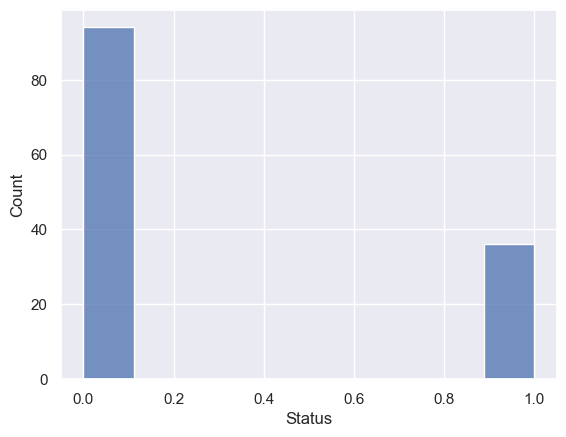

In [261]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='Status', data=df, )
plt.show()

Skewness: 1.0087170881216265
Kurtosis: -0.9980853768777567




C:\Users\Pavan\AppData\Local\Temp\ipykernel_14516\1362203378.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Status'])


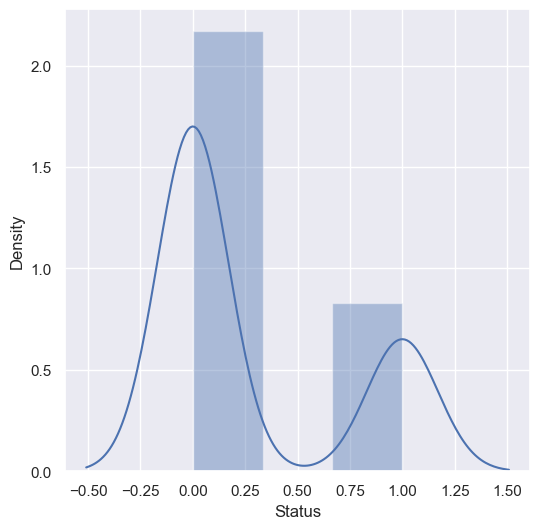

In [262]:
print(f"Skewness: {df['Status'].skew()}\nKurtosis: {df['Status'].kurt()}\n\n")

plt.figure(figsize=[6,6])
sns.distplot(df['Status'])
plt.show()

In [263]:
X = df.drop(['Name', 'Age', 'Gender', 'Status'], axis=1).copy()
y = df['Status'].copy()

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [265]:
params = {'ccp_alpha': [0.0001, 0.001, 0.01, 0.05, \
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, \
    1, 2, 3, 4, 5, 6, 7, 8, 9, \
    10, 20, 50, 100, 500, 1000]
}

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [267]:
rfc = RandomForestClassifier()
rfcCV = GridSearchCV(estimator=rfc, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)
rfcCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4,
                                       5, 6, 7, 8, 9, 10, 20, 50, 100, 500,
                                       1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [268]:
opt_alpha_random_forest = rfcCV.best_params_['ccp_alpha']
print(f"Optimum Alpha value: {opt_alpha_random_forest}")

Optimum Alpha value: 0.1


In [269]:
clf = RandomForestClassifier(max_depth=6, random_state=1, ccp_alpha=opt_alpha_random_forest)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

In [270]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [275]:
print(f"Accuracy: {int(accuracy_score(y_test, y_pred_test)*100)}%")

Accuracy: 82%


In [272]:
confusion_matrix(y_test, y_pred_test)

array([[32,  0],
       [ 7,  0]], dtype=int64)

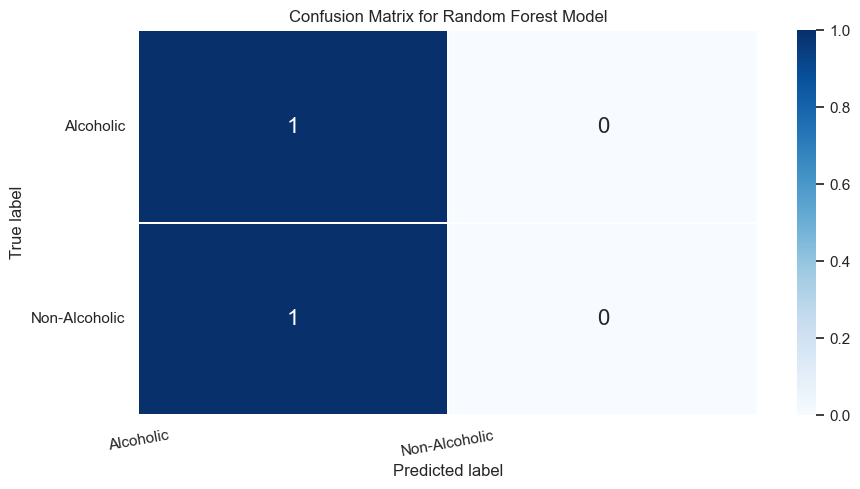

In [273]:
confusion_matrix(y_test, y_pred_test)
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':16},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Alcoholic', 'Non-Alcoholic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=10)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [276]:
from analysis_script import analyze_ecg

In [288]:
op = clf.predict(np.array(analyze_ecg("D:\dev\PROJECTS\ECG-Analysis-SP2\Dataset\data\\alcoholic\Pintu-31-M.adicht")[3:]).reshape(1,-1))
op

d:\dev\PROJECTS\ECG-Analysis-SP2\code\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [300]:
COLS = ["Mean_RR", "STD_RR", "RMS_RR", "Mean_HR" "STD_HR", "RMSSD"]
t = analyze_ecg("D:\dev\PROJECTS\ECG-Analysis-SP2\Dataset\data\\alcoholic\Pintu-31-M.adicht")[3:]
t

['765.3784928027096',
 '50.96032736398178',
 '767.0731335472462',
 '78.39258688898919',
 '6.173785057547206',
 '58.31913225040885']

(39, 6)